# Wholesale

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### Import Data and Explore

In [2]:
ws = pd.read_csv('wholesale customers data.csv')

In [3]:
ws.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Check for missing values
ws.isnull().sum(axis = 0)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Preprocessing

In [6]:
X = ws.drop(['Channel','Region'],axis=1)

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### KMeans

In [8]:
ssq = {}
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    ssq[i] = kmeans.inertia_
    print('i:', i)
    print('inertia: ',kmeans.inertia_)

i: 1
inertia:  2640.0
i: 2
inertia:  1954.6477611552878
i: 3
inertia:  1614.5183504384179
i: 4
inertia:  1316.6357505603378
i: 5
inertia:  1059.1497526912442
i: 6
inertia:  917.913897536389
i: 7
inertia:  832.6259428682436
i: 8
inertia:  740.3520805206423
i: 9
inertia:  655.0215318276074
i: 10
inertia:  605.0008013715483
i: 11
inertia:  567.3656377752584
i: 12
inertia:  516.6667130599303
i: 13
inertia:  489.1248061938425
i: 14
inertia:  454.20040575427765
i: 15
inertia:  428.43512342040583


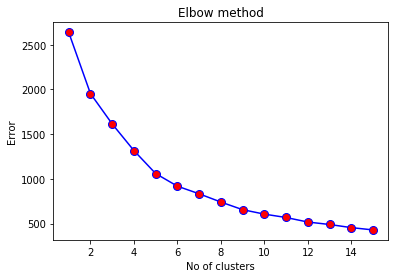

In [9]:
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.plot(list(ssq.keys()),list(ssq.values()),linestyle ='-',marker='o',color='b',markersize=8,markerfacecolor='r')

In [10]:
# Best k = 9
KMeansModel = KMeans(n_clusters=9,random_state=0)
y = KMeansModel.fit_predict(X)

In [11]:
centers = KMeansModel.cluster_centers_
centers

array([[-4.88890155e-01,  4.12367705e-01,  5.03138188e-01,
        -3.10401994e-01,  4.75392947e-01,  1.87233486e-02],
       [-5.04524415e-01,  1.45013858e+00,  1.97310976e+00,
        -2.79171741e-01,  2.20958227e+00,  2.07537059e-01],
       [ 1.96787335e+00, -2.16962948e-01, -2.66530681e-01,
         1.55650409e-01, -4.15981484e-01,  8.94253690e-02],
       [ 1.96681731e+00,  5.17550306e+00,  1.28721685e+00,
         6.90059988e+00, -5.54861977e-01,  1.64784475e+01],
       [ 2.04637856e-01, -2.93730843e-01, -4.34919732e-01,
         1.39983194e+00, -5.00730940e-01, -5.64635961e-02],
       [ 1.07676383e+00,  5.10911660e+00,  5.63831714e+00,
        -8.98985393e-02,  5.68883695e+00,  4.20295281e-01],
       [ 7.92784210e-01,  5.61685048e-01, -1.13014360e-02,
         9.25255676e+00, -4.64047057e-01,  9.33164138e-01],
       [ 3.00956674e+00,  1.66698428e+00,  9.88186822e-01,
         1.09793764e+00,  1.84308473e-01,  4.24194394e+00],
       [-2.55960794e-01, -4.44686713e-01, -4.889